##  What time of day are delays happening?

### Flights delayed which are departing from LAX.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Open and read files
flight_delay_origin = pd.read_csv("../clean/LAX_Origin_Flight_Delays_2016.csv")

In [3]:
# retrive and conver in to dataframe
flight_delay_origin = pd.DataFrame(flight_delay_origin)
flight_delay_origin.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,TailNum,FlightNum,...,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierName
0,2016,1,1,1,5,2016-01-01,AA,AA,N3MCAA,52,...,253.0,1.0,2311.0,10,62.0,0.0,0.0,0.0,0.0,American Airlines Inc.
1,2016,1,1,2,6,2016-01-02,AA,AA,N3MKAA,52,...,252.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2016,1,1,3,7,2016-01-03,AA,AA,N3LVAA,52,...,260.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
3,2016,1,1,4,1,2016-01-04,AA,AA,N3LLAA,52,...,288.0,1.0,2311.0,10,0.0,0.0,19.0,0.0,0.0,American Airlines Inc.
4,2016,1,1,5,2,2016-01-05,AA,AA,N3LPAA,52,...,270.0,1.0,2311.0,10,0.0,12.0,9.0,0.0,0.0,American Airlines Inc.
5,2016,1,1,6,3,2016-01-06,AA,AA,N3MHAA,52,...,264.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
6,2016,1,1,7,4,2016-01-07,AA,AA,N3LEAA,52,...,273.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
7,2016,1,1,8,5,2016-01-08,AA,AA,N3MEAA,52,...,261.0,1.0,2311.0,10,0.0,0.0,16.0,0.0,0.0,American Airlines Inc.
8,2016,1,1,9,6,2016-01-09,AA,AA,N3MGAA,52,...,265.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2016,1,1,10,7,2016-01-10,AA,AA,N3MDAA,52,...,264.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [4]:
df1_deptime = flight_delay_origin[['DepTime','CarrierName','DepDel15']]
df1_deptime = pd.DataFrame(df1_deptime)
df1_deptime.head()

,DepTime,CarrierName,DepDel15
0,1443.0,American Airlines Inc.,1.0
1,1318.0,American Airlines Inc.,0.0
2,1315.0,American Airlines Inc.,0.0
3,1317.0,American Airlines Inc.,0.0
4,1327.0,American Airlines Inc.,0.0


In [5]:
delay_times = df1_deptime.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_times['Times'] = pd.cut(delay_times['DepTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)

In [6]:
# total departure delays during day using bins
df1 = delay_times.groupby('Times')['DepDel15','CarrierName'].sum()
df1.reset_index()

,Times,DepDel15
0,Early Morning(00:01am to 5:59am),2922.0
1,Morning(6:00am to 11:59am),12279.0
2,Noon(12:00pm to 5:59pm),17527.0
3,Evening(6:00pm to 23:59pm),15730.0


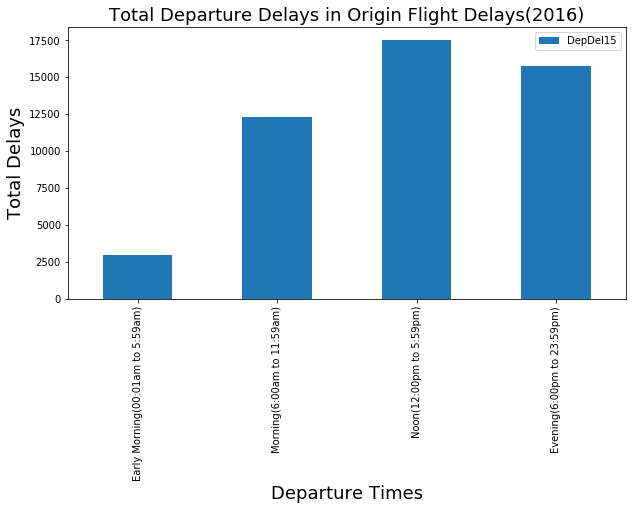

In [7]:
df1.plot(kind='bar',figsize=(10,5))
plt.xlabel('Departure Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Departure Delays in Origin Flight Delays(2016)',fontsize='18')
plt.show()

In [8]:
df_arrtime1 = flight_delay_origin[['ArrTime','CarrierName','ArrDel15']]
df_arrtime1 = pd.DataFrame(df_arrtime1)
df_arrtime1.head()

,ArrTime,CarrierName,ArrDel15
0,2217.0,American Airlines Inc.,1.0
1,2051.0,American Airlines Inc.,0.0
2,2056.0,American Airlines Inc.,0.0
3,2134.0,American Airlines Inc.,1.0
4,2131.0,American Airlines Inc.,1.0


In [9]:
delay_arr_times1 = df_arrtime1.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_arr_times1['Times'] = pd.cut(delay_arr_times1['ArrTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)
df4 = delay_arr_times1.groupby('Times')['ArrDel15','CarrierName'].sum()
df4.reset_index()

,Times,ArrDel15
0,Early Morning(00:01am to 5:59am),6000.0
1,Morning(6:00am to 11:59am),7264.0
2,Noon(12:00pm to 5:59pm),14602.0
3,Evening(6:00pm to 23:59pm),19402.0


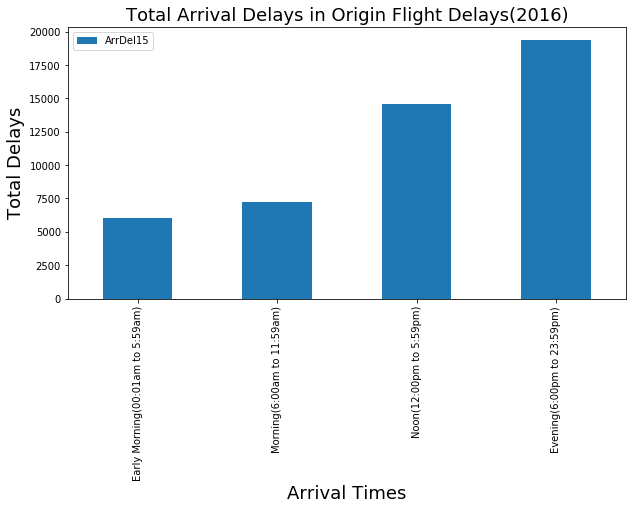

In [10]:
df4.plot(kind='bar',figsize=(10,5))
plt.xlabel('Arrival Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Arrival Delays in Origin Flight Delays(2016)',fontsize='18')
plt.show()

In [11]:
join_df = df4.join(df1)
join_df = join_df.rename(columns={'ArrDel15':'Arrival Delay','DepDel15':'Departure Delay'})

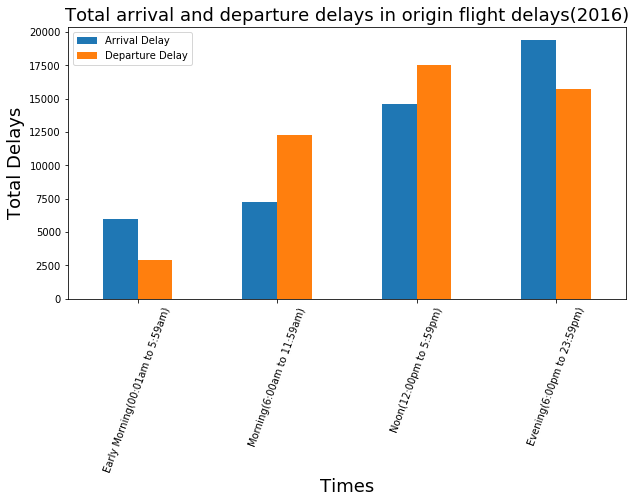

In [12]:
join_df.plot(kind='bar',figsize=(10,5))
plt.xlabel('Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total arrival and departure delays in origin flight delays(2016)',fontsize='18')
plt.xticks(rotation=70)
plt.savefig('OriginFlights_Arr and Dep during day')
plt.show()